In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import xgboost as xgb

In [3]:
murder_data = pd.read_csv('../Data/Violent/VICTIM_OF_MURDER_0.csv')

In [12]:
murder_data['STATE/UT'] = murder_data['STATE/UT'].str.upper()

state_wise = murder_data.groupby(['STATE/UT','YEAR','GENDER'])[['Upto 10 years','10-15 years','15-18 years','18-30 years','30-50 years','Above 50 years','Total']].sum()
#Find unique State/UT
state_wise = state_wise.reset_index()
state_wise

,STATE/UT,YEAR,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
0,A&N ISLANDS,2001,Female,0,0,0,4,2,0,6
1,A&N ISLANDS,2001,Male,0,1,0,3,3,0,7
2,A&N ISLANDS,2001,Total,0,1,0,7,5,0,13
3,A&N ISLANDS,2002,Female,0,0,1,2,4,0,7
4,A&N ISLANDS,2002,Male,0,0,0,4,4,2,10
...,...,...,...,...,...,...,...,...,...,...
1357,WEST BENGAL,2012,Male,1,9,23,861,522,263,1679
1358,WEST BENGAL,2012,Total,1,11,34,1162,724,320,2252
1359,WEST BENGAL,2013,Female,2,2,20,344,219,4,591
1360,WEST BENGAL,2013,Male,1,11,34,1060,555,12,1673


In [13]:
state_wise.to_csv('../Data/Violent/state_wise_murder.csv',index=False)

In [17]:
year_wise = murder_data.groupby(['YEAR','GENDER'])[['Upto 10 years','10-15 years','15-18 years','18-30 years','30-50 years','Above 50 years','Total']].sum()
year_wise = year_wise.reset_index()
year_wise.to_csv('../Data/Violent/year_wise_murder.csv')

In [27]:
population_data = pd.read_csv('../population.csv')
population_data = population_data.rename(columns={'Year':'YEAR'})
population_data = population_data[['YEAR','Population', 'Literacy Rate']]
year_wise_data = pd.read_csv('../Data/Violent/year_wise_murder.csv')
filtered_year_wise_data = year_wise_data[year_wise_data['GENDER'] == 'Total']
merged_df = pd.merge(filtered_year_wise_data, population_data, on='YEAR', how='inner')
merged_df['Crime_Rate'] = merged_df['Total'] / merged_df['Population'] * 1000000
merged_df


,Unnamed: 0,YEAR,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total,Population,Literacy Rate,Crime_Rate
0,2,2001,Total,840,587,2109,16412,15227,3461,38636,1078970907,64.83,35.808194
1,5,2002,Total,547,392,559,18006,15230,3299,38033,1098313039,65.69,34.628561
2,8,2003,Total,537,355,721,15362,13834,3012,33821,1117415123,66.57,30.267176
3,11,2004,Total,639,399,676,16059,13993,3149,34915,1136264583,67.46,30.727878
4,14,2005,Total,606,372,623,16178,13425,3215,34419,1154638713,68.36,29.809324
5,17,2006,Total,640,403,680,15686,13031,3368,33808,1172373788,69.28,28.837219
6,20,2007,Total,708,466,584,15183,13255,3232,33428,1189691809,70.20,28.098033
7,23,2008,Total,670,432,609,15234,13576,3206,33727,1206734806,71.14,27.948974
8,26,2009,Total,713,416,566,14879,13370,3215,33159,1223640160,72.09,27.098653
9,29,2010,Total,727,355,566,15787,13134,3339,33908,1240613620,73.06,27.331636


In [24]:
features = merged_df[['YEAR', 'Population', 'Literacy Rate']]
target = merged_df['Total']

Linear Regression Mean Squared Error: 86989.96326670058
Linear Regression Accuracy: 0.9783582986288938

Random Forest Mean Squared Error: 1511552.6688666681
Random Forest Accuracy: 0.623950048512858

Gradient Boosting Mean Squared Error: 369364.76585248625
Gradient Boosting Accuracy: 0.9081079970676569



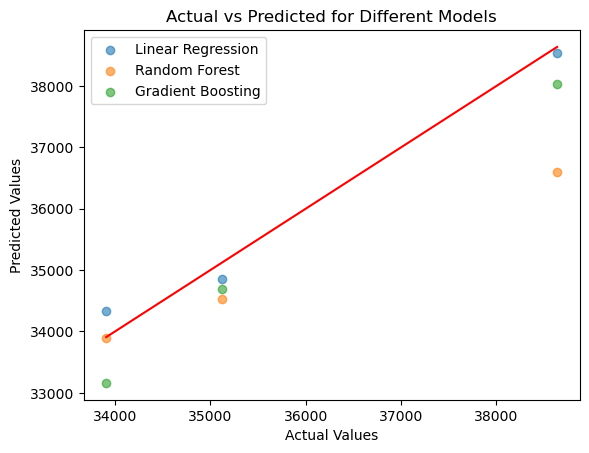

Linear Regression Future Predictions for Total Crimes: [34799.60738935]
Random Forest Future Predictions for Total Crimes: [34247.47]
Gradient Boosting Future Predictions for Total Crimes: [33901.3519812]


In [26]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Step 4: Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    accuracy = model.score(X_test, y_test)

    print(f'{model_name} Mean Squared Error: {mse}')
    print(f'{model_name} Accuracy: {accuracy}\n')

    # Plotting actual vs predicted values
    plt.scatter(y_test, predictions, label=model_name, alpha=0.6)

# Step 5: Formatting the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted for Different Models')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 6: Predicting future values
future_years = pd.DataFrame({
    'YEAR': [2014],
    'Population': [1307246509],  # Example future populations
    'Literacy Rate': [78.08]  # Example future literacy rates
})

for model_name, model in models.items():
    future_predictions = model.predict(future_years)
    print(f"{model_name} Future Predictions for Total Crimes: {future_predictions}")


Linear Regression for Total Mean Squared Error: 86989.96326670058
Linear Regression for Total Accuracy: 0.9783582986288938

Random Forest for Total Mean Squared Error: 1511552.6688666681
Random Forest for Total Accuracy: 0.623950048512858

Gradient Boosting for Total Mean Squared Error: 369364.76585248625
Gradient Boosting for Total Accuracy: 0.9081079970676569

Support Vector Regression for Total Mean Squared Error: 8131003.4770273715
Support Vector Regression for Total Accuracy: -1.022862667015434

XGBoost for Total Mean Squared Error: 308202.5183664958
XGBoost for Total Accuracy: 0.9233241677284241



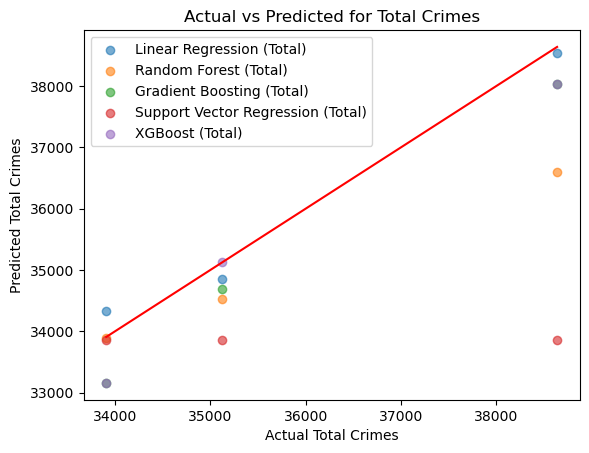

Linear Regression for Crime Rate Mean Squared Error: 0.06902461889488976
Linear Regression for Crime Rate Accuracy: 0.9955618472010968

Random Forest for Crime Rate Mean Squared Error: 2.5833459610710308
Random Forest for Crime Rate Accuracy: 0.8338957274777262

Gradient Boosting for Crime Rate Mean Squared Error: 0.5009167339967994
Gradient Boosting for Crime Rate Accuracy: 0.9677919988462266

Support Vector Regression for Crime Rate Mean Squared Error: 18.05946020221218
Support Vector Regression for Crime Rate Accuracy: -0.16118922677694303

XGBoost for Crime Rate Mean Squared Error: 0.5281325744373712
XGBoost for Crime Rate Accuracy: 0.9660420716411265



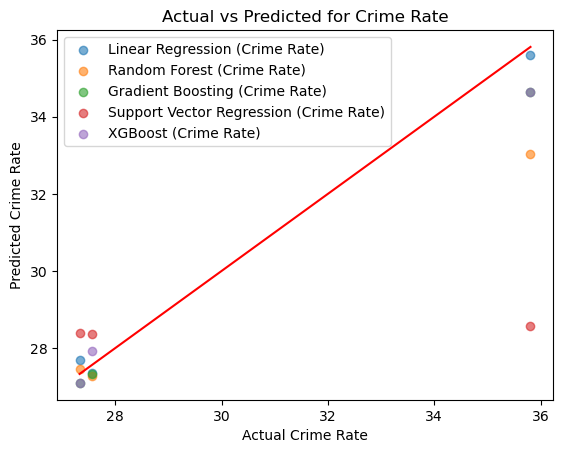

Linear Regression Future Predictions for Total Crimes: [1196.45734315 1209.40859717 1222.35985119]
Random Forest Future Predictions for Total Crimes: [31.14575244 30.54180982 30.46156786]
Gradient Boosting Future Predictions for Total Crimes: [31.64013142 30.59779232 30.27712169]
Support Vector Regression Future Predictions for Total Crimes: [28.73659306 28.7366162  28.73663934]
XGBoost Future Predictions for Total Crimes: [26.257883 26.257883 26.257883]
Linear Regression Future Predictions for Crime Rate: [1196.45734315 1209.40859717 1222.35985119]
Random Forest Future Predictions for Crime Rate: [31.14575244 30.54180982 30.46156786]
Gradient Boosting Future Predictions for Crime Rate: [31.64013142 30.59779232 30.27712169]
Support Vector Regression Future Predictions for Crime Rate: [28.73659306 28.7366162  28.73663934]
XGBoost Future Predictions for Crime Rate: [26.257883 26.257883 26.257883]


In [33]:
features = merged_df[['YEAR', 'Population', 'Literacy Rate']]
target_total = merged_df['Total']
target_crime_rate = merged_df['Crime_Rate']

# Step 3: Split the data into training and testing sets for Total
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(features, target_total, test_size=0.2, random_state=42)

# Step 4: Initialize models, including XGBoost
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),  # Using RBF kernel
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)  # XGBoost model
}

# Step 5: Train, predict, and evaluate each model for Total
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_total, y_train_total)

    # Make predictions
    predictions_total = model.predict(X_test_total)

    # Evaluate the model
    mse_total = mean_squared_error(y_test_total, predictions_total)
    accuracy_total = model.score(X_test_total, y_test_total)

    print(f'{model_name} for Total Mean Squared Error: {mse_total}')
    print(f'{model_name} for Total Accuracy: {accuracy_total}\n')

    # Plotting actual vs predicted values for Total
    plt.scatter(y_test_total, predictions_total, label=f'{model_name} (Total)', alpha=0.6)

# Step 6: Formatting the plot for Total
plt.xlabel('Actual Total Crimes')
plt.ylabel('Predicted Total Crimes')
plt.title('Actual vs Predicted for Total Crimes')
plt.plot([min(y_test_total), max(y_test_total)], [min(y_test_total), max(y_test_total)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 7: Split the data into training and testing sets for Crime Rate
X_train_crime_rate, X_test_crime_rate, y_train_crime_rate, y_test_crime_rate = train_test_split(features, target_crime_rate, test_size=0.2, random_state=42)

# Step 8: Train, predict, and evaluate each model for Crime Rate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_crime_rate, y_train_crime_rate)

    # Make predictions
    predictions_crime_rate = model.predict(X_test_crime_rate)

    # Evaluate the model
    mse_crime_rate = mean_squared_error(y_test_crime_rate, predictions_crime_rate)
    accuracy_crime_rate = model.score(X_test_crime_rate, y_test_crime_rate)

    print(f'{model_name} for Crime Rate Mean Squared Error: {mse_crime_rate}')
    print(f'{model_name} for Crime Rate Accuracy: {accuracy_crime_rate}\n')

    # Plotting actual vs predicted values for Crime Rate
    plt.scatter(y_test_crime_rate, predictions_crime_rate, label=f'{model_name} (Crime Rate)', alpha=0.6)

# Step 9: Formatting the plot for Crime Rate
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs Predicted for Crime Rate')
plt.plot([min(y_test_crime_rate), max(y_test_crime_rate)], [min(y_test_crime_rate), max(y_test_crime_rate)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 10: Predicting future values for both targets
future_years = pd.DataFrame({
    'YEAR': [2024, 2025, 2026],
    'Population': [1050000, 1100000, 1150000],  # Example future populations
    'Literacy Rate': [66, 67, 68]  # Example future literacy rates
})

# Predictions for Total Crimes
for model_name, model in models.items():
    future_predictions_total = model.predict(future_years)
    print(f"{model_name} Future Predictions for Total Crimes: {future_predictions_total}")

# Predictions for Crime Rate
for model_name, model in models.items():
    future_predictions_crime_rate = model.predict(future_years)
    print(f"{model_name} Future Predictions for Crime Rate: {future_predictions_crime_rate}")
